In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from pathlib import Path


In [2]:
# Set up paths dynamically
current_dir = Path.cwd()
project_root = current_dir.parent if current_dir.name == 'code' else current_dir
code_dir = project_root / 'code'
data_dir = project_root / 'data'
figures_dir = project_root / 'figures'

# Create directories if they don't exist
data_dir.mkdir(exist_ok=True)
figures_dir.mkdir(exist_ok=True)

# Add code directory to Python path
sys.path.append(str(code_dir))

print(f"Project root: {project_root}")
print(f"Code directory: {code_dir}")
print(f"Data directory: {data_dir}")
print(f"Figures directory: {figures_dir}")


Project root: /Users/harashimakoshi/CS332/332Project2
Code directory: /Users/harashimakoshi/CS332/332Project2/code
Data directory: /Users/harashimakoshi/CS332/332Project2/data
Figures directory: /Users/harashimakoshi/CS332/332Project2/figures


In [11]:
# Import custom modules
from A_afp import AdversarialFairPayoffs
from B_bp import BernoulliPayoffs
# from C_pp import PachinkoPayoffs
# from D_ad import AdversarialGenerativeModel
from EW import ExponentialWeights
from MC import MonteCarloSimulation

In [12]:
# Fixed parameters
k = 3  
n = 1000  
num_simulations = 2000  # Monte Carlo simulation times

# Epsilon values
epsilon_values = {
    'random': 0.01,  
    'optimal': np.sqrt(np.log(k) / n), 
    'FTL': 100  
}

print(f"Epsilon values:")
for name, value in epsilon_values.items():
    print(f"  {name}: {value:.6f}")


Epsilon values:
  random: 0.010000
  optimal: 0.033145
  FTL: 100.000000


In [13]:
# AdversarialFairPayoffs environment

# Save results
results_data = []

for epsilon_name, epsilon_value in epsilon_values.items():
    print(f"\nRunning simulations for {epsilon_name} (epsilon = {epsilon_value:.6f})...")
    
    regret_histories = []
    total_payoffs = []
    
    for sim in range(num_simulations):
        env = AdversarialFairPayoffs(k)
        algorithm = ExponentialWeights(k, epsilon=epsilon_value, n=n)
        
        # Run algorithm
        regret_history, total_payoff, action_history, cumulative_payoffs = algorithm.run_algorithm(env.generate_payoffs)
        
        regret_histories.append(regret_history)
        total_payoffs.append(total_payoff)
        
        if (sim + 1) % 20 == 0:
            print(f"  Completed {sim + 1}/{num_simulations} simulations")
    
    # Add results to dataframe
    regret_array = np.array(regret_histories)
    mean_regret = np.mean(regret_array, axis=0)
    std_regret = np.std(regret_array, axis=0)
    final_regrets = regret_array[:, -1]
    
    for round_num in range(n):
        results_data.append({
            'round': round_num + 1,
            'epsilon_type': epsilon_name,
            'epsilon_value': epsilon_value,
            'mean_regret': mean_regret[round_num],
            'std_regret': std_regret[round_num],
            'final_regret_mean': np.mean(final_regrets),
            'final_regret_std': np.std(final_regrets)
        })

print("\nAll simulations completed!")

results_df = pd.DataFrame(results_data)

# Save results to csv file
adversarial_csv_path = data_dir / 'adversarial_fair_payoffs_results.csv'
results_df.to_csv(adversarial_csv_path, index=False)
print(f"Results saved to {adversarial_csv_path}")

# Statistical results
print("\nFinal regret statistics:")
for epsilon_name in epsilon_values.keys():
    subset = results_df[results_df['epsilon_type'] == epsilon_name]
    final_stats = subset.iloc[0]  
    print(f"  {epsilon_name}: Mean = {final_stats['final_regret_mean']:.4f}, Std = {final_stats['final_regret_std']:.4f}")



Running simulations for random (epsilon = 0.010000)...
  Completed 20/2000 simulations
  Completed 40/2000 simulations
  Completed 60/2000 simulations
  Completed 80/2000 simulations
  Completed 100/2000 simulations
  Completed 120/2000 simulations
  Completed 140/2000 simulations
  Completed 160/2000 simulations
  Completed 180/2000 simulations
  Completed 200/2000 simulations
  Completed 220/2000 simulations
  Completed 240/2000 simulations
  Completed 260/2000 simulations
  Completed 280/2000 simulations
  Completed 300/2000 simulations
  Completed 320/2000 simulations
  Completed 340/2000 simulations
  Completed 360/2000 simulations
  Completed 380/2000 simulations
  Completed 400/2000 simulations
  Completed 420/2000 simulations
  Completed 440/2000 simulations
  Completed 460/2000 simulations
  Completed 480/2000 simulations
  Completed 500/2000 simulations
  Completed 520/2000 simulations
  Completed 540/2000 simulations
  Completed 560/2000 simulations
  Completed 580/2000 sim

In [14]:
# BernoulliPayoffs environment

# Save results
results_data_bernoulli = []

for epsilon_name, epsilon_value in epsilon_values.items():
    print(f"\nRunning simulations for {epsilon_name} (epsilon = {epsilon_value:.6f})...")
    
    regret_histories = []
    total_payoffs = []
    
    for sim in range(num_simulations):
        env = BernoulliPayoffs(k)
        algorithm = ExponentialWeights(k, epsilon=epsilon_value, n=n)
        
        # Run algorithm
        regret_history, total_payoff, action_history, cumulative_payoffs = algorithm.run_algorithm(env.generate_payoffs)
        
        regret_histories.append(regret_history)
        total_payoffs.append(total_payoff)
        
        if (sim + 1) % 20 == 0:
            print(f"  Completed {sim + 1}/{num_simulations} simulations")
    
    # Add results to dataframe
    regret_array = np.array(regret_histories)
    mean_regret = np.mean(regret_array, axis=0)
    std_regret = np.std(regret_array, axis=0)
    final_regrets = regret_array[:, -1]
    
    for round_num in range(n):
        results_data_bernoulli.append({
            'round': round_num + 1,
            'epsilon_type': epsilon_name,
            'epsilon_value': epsilon_value,
            'mean_regret': mean_regret[round_num],
            'std_regret': std_regret[round_num],
            'final_regret_mean': np.mean(final_regrets),
            'final_regret_std': np.std(final_regrets)
        })

print("\nAll simulations completed!")

results_df_bernoulli = pd.DataFrame(results_data_bernoulli)

# Save results to csv file
bernoulli_csv_path = data_dir / 'bernoulli_payoffs_results.csv'
results_df_bernoulli.to_csv(bernoulli_csv_path, index=False)
print(f"Results saved to {bernoulli_csv_path}")

# Statistical results
print("\nFinal regret statistics:")
for epsilon_name in epsilon_values.keys():
    subset = results_df_bernoulli[results_df_bernoulli['epsilon_type'] == epsilon_name]
    final_stats = subset.iloc[0]  
    print(f"  {epsilon_name}: Mean = {final_stats['final_regret_mean']:.4f}, Std = {final_stats['final_regret_std']:.4f}")



Running simulations for random (epsilon = 0.010000)...
Bernoulli probabilities for each action: [0.11178918 0.17788826 0.02414474]
Bernoulli probabilities for each action: [0.17574682 0.01047606 0.38930247]
Bernoulli probabilities for each action: [0.26238145 0.23817494 0.25113958]
Bernoulli probabilities for each action: [0.41937188 0.03129156 0.07837334]
Bernoulli probabilities for each action: [0.01607455 0.48070934 0.00093684]
Bernoulli probabilities for each action: [0.41651999 0.49727383 0.01082605]
Bernoulli probabilities for each action: [0.43932054 0.08994566 0.27080944]
Bernoulli probabilities for each action: [0.49876152 0.33314771 0.27710589]
Bernoulli probabilities for each action: [0.15240484 0.18928032 0.35026729]
Bernoulli probabilities for each action: [0.45973328 0.20055969 0.07472844]
Bernoulli probabilities for each action: [0.10259826 0.04309595 0.05909467]
Bernoulli probabilities for each action: [0.46102474 0.40714752 0.28812832]
Bernoulli probabilities for each

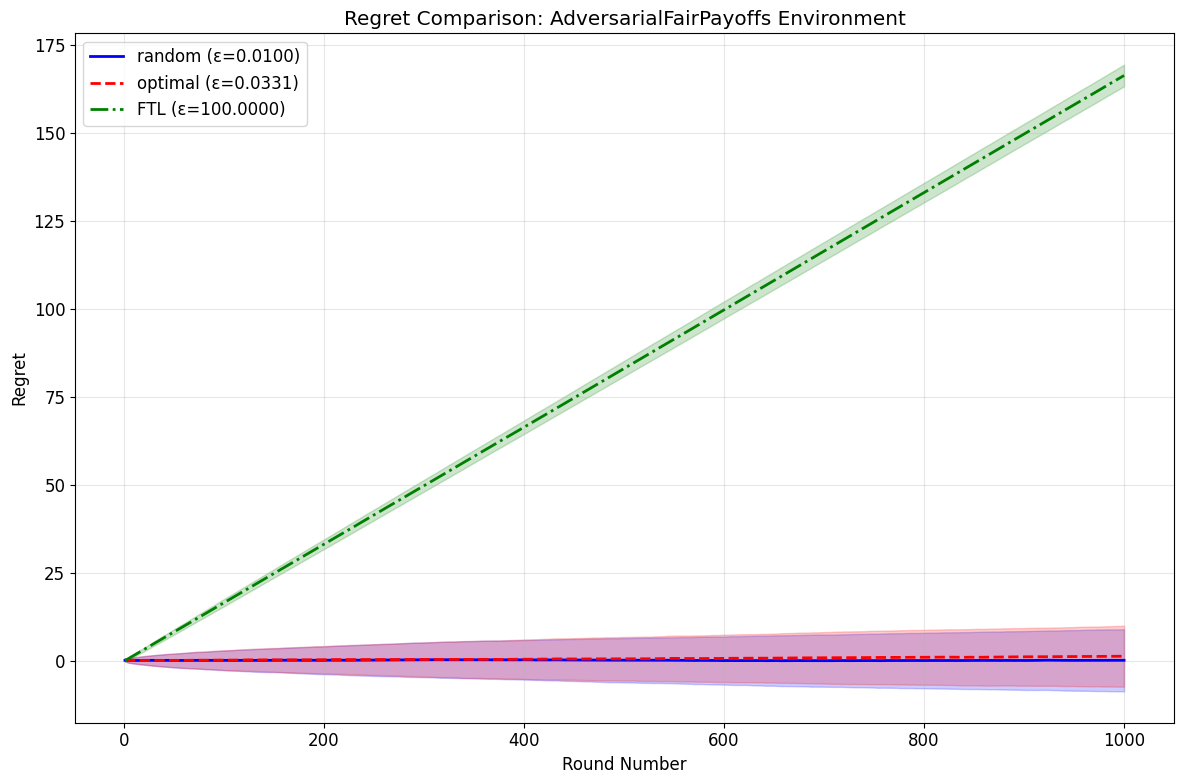

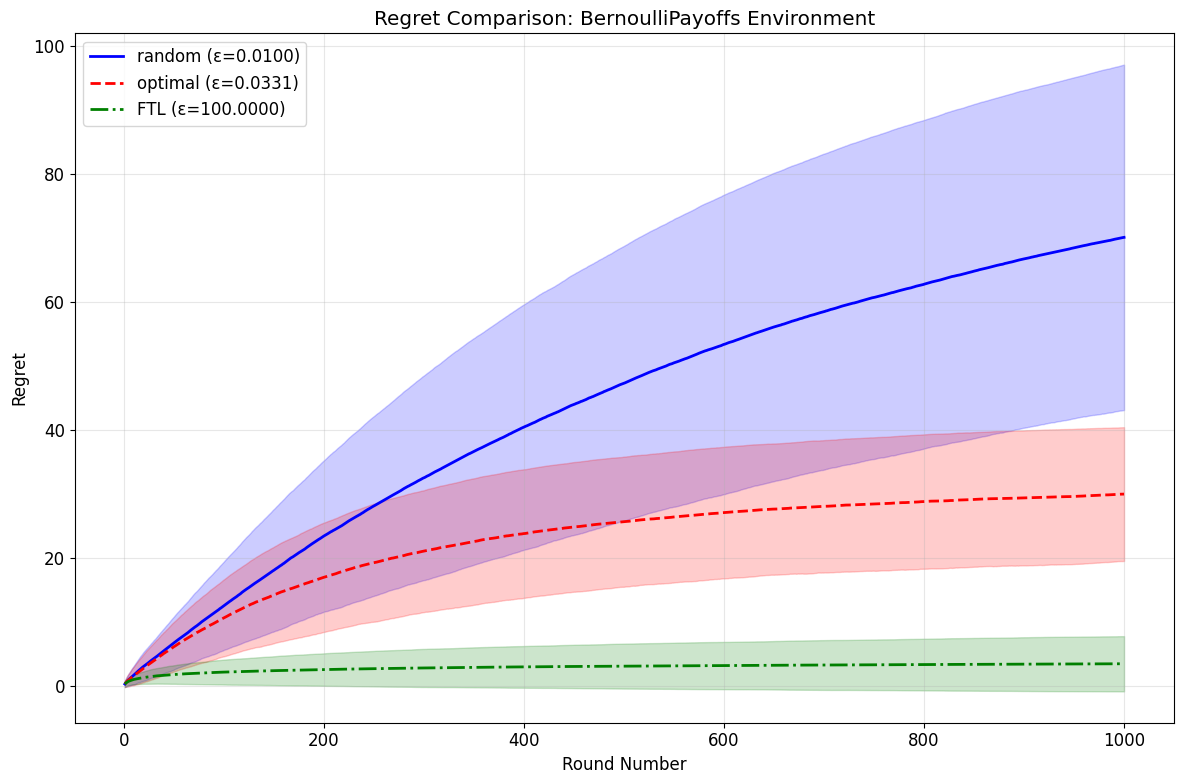

In [15]:
# Import visualization functions and run plots
import visualization

# Load the data
adversarial_df = pd.read_csv(adversarial_csv_path)
bernoulli_df = pd.read_csv(bernoulli_csv_path)

# Use the plot_regret_comparison function from visualization.py
visualization.plot_regret_comparison(adversarial_df, 'AdversarialFairPayoffs Environment', 'adversarial_regret_comparison.png')
visualization.plot_regret_comparison(bernoulli_df, 'BernoulliPayoffs Environment', 'bernoulli_regret_comparison.png')


# detailed analysis
action choice and local optima.

In [16]:
# BernoulliPayoffs(Analyze action selection patterns for each epsilon value)

action_analysis_data = []

for epsilon_name, epsilon_value in epsilon_values.items():
    print(f"\nAnalyzing action patterns for {epsilon_name} (epsilon = {epsilon_value:.6f})...")
    
    for sim in range(num_simulations):
        # Create environment and algorithm
        env = BernoulliPayoffs(k)
        algorithm = ExponentialWeights(k, epsilon=epsilon_value, n=n)
        
        # Get probabilities for this simulation
        probabilities = env.probabilities.copy()
        prob_order = np.argsort(probabilities)[::-1]  # Sort in descending order
        
        # Run algorithm
        regret_history, total_payoff, action_history, cumulative_payoffs = algorithm.run_algorithm(env.generate_payoffs)
        
        # Count action selections
        action_counts = np.bincount(action_history, minlength=k)
        
        # Calculate action selection rates
        action_rates = action_counts / n
        
        # Store analysis data
        action_analysis_data.append({
            'simulation': sim + 1,
            'epsilon_type': epsilon_name,
            'epsilon_value': epsilon_value,
            'probabilities': probabilities.tolist(),
            'prob_order': prob_order.tolist(),  # Index of actions sorted by probability (highest first)
            'action_counts': action_counts.tolist(),
            'action_rates': action_rates.tolist(),
            'total_payoff': total_payoff,
            'final_regret': regret_history[-1]
        })
        
        if (sim + 1) % 200 == 0:
            print(f"  Completed {sim + 1}/{num_simulations} simulations")

print("\nAction analysis completed!")

# Convert to DataFrame
action_df = pd.DataFrame(action_analysis_data)

# Save detailed results
action_csv_path = data_dir / 'bernoulli_action_analysis.csv'
action_df.to_csv(action_csv_path, index=False)
print(f"Action analysis saved to {action_csv_path}")

# Display summary statistics
print("\nAction Selection Summary:")
for epsilon_type in epsilon_values.keys():
    subset = action_df[action_df['epsilon_type'] == epsilon_type]
    
    print(f"\n{epsilon_type} (ε={subset['epsilon_value'].iloc[0]:.6f}):")
    
    # Average action selection rates
    avg_rates = np.mean([rates for rates in subset['action_rates']], axis=0)
    print(f"  Average action selection rates: {avg_rates}")
    
    # Most frequently selected action
    most_selected = np.argmax(avg_rates)
    print(f"  Most frequently selected action: {most_selected} (rate: {avg_rates[most_selected]:.3f})")
    
    # Probability vs selection correlation
    avg_probs = np.mean([probs for probs in subset['probabilities']], axis=0)
    prob_order = np.argsort(avg_probs)[::-1]
    print(f"  Probability order (highest first): {prob_order}")
    print(f"  Selection rate order (highest first): {np.argsort(avg_rates)[::-1]}")
    
    # Correlation between probability and selection rate
    correlation = np.corrcoef(avg_probs, avg_rates)[0, 1]
    print(f"  Probability-Selection correlation: {correlation:.3f}")



Analyzing action patterns for random (epsilon = 0.010000)...
Bernoulli probabilities for each action: [0.00091183 0.17572284 0.46114369]
Bernoulli probabilities for each action: [0.42024019 0.45160862 0.37858525]
Bernoulli probabilities for each action: [0.45091554 0.32134972 0.33589954]
Bernoulli probabilities for each action: [0.47622587 0.09315529 0.31592718]
Bernoulli probabilities for each action: [0.15554897 0.43547044 0.35201744]
Bernoulli probabilities for each action: [0.14508964 0.05931269 0.08237707]
Bernoulli probabilities for each action: [0.34324304 0.26204806 0.14529785]
Bernoulli probabilities for each action: [0.38044766 0.44825664 0.29913511]
Bernoulli probabilities for each action: [0.16967041 0.38845854 0.33470701]
Bernoulli probabilities for each action: [0.0776947  0.16695393 0.48276695]
Bernoulli probabilities for each action: [0.2667892  0.32099857 0.15419085]
Bernoulli probabilities for each action: [0.44792178 0.11430251 0.26068656]
Bernoulli probabilities fo


Rank analysis saved to /Users/harashimakoshi/CS332/332Project2/figures/bernoulli_rank_analysis.png


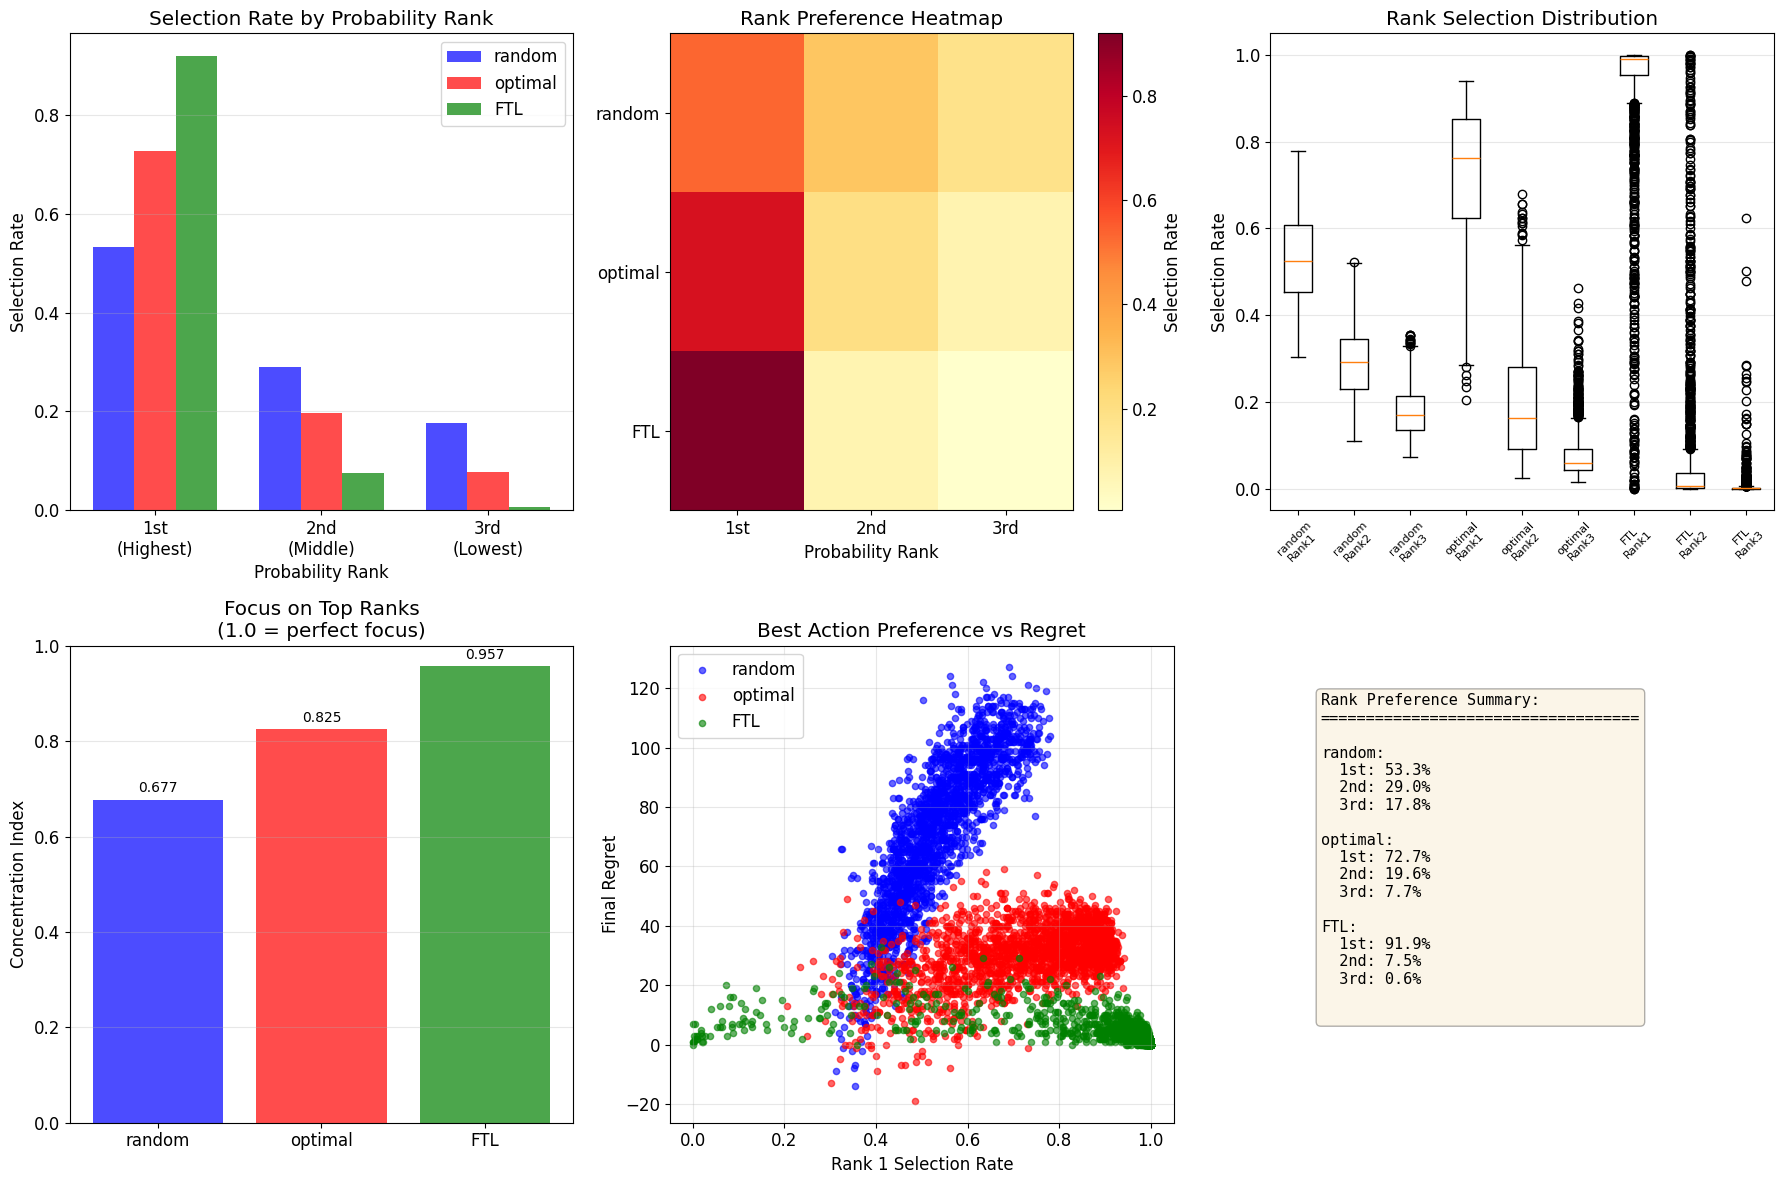

Rank data saved to /Users/harashimakoshi/CS332/332Project2/data/bernoulli_rank_analysis.csv


In [18]:
# Rank-based Analysis: Which probability ranks does each epsilon strategy prefer?

# Create rank-based analysis
rank_analysis_data = []

for epsilon_type in epsilon_values.keys():
    subset = action_df[action_df['epsilon_type'] == epsilon_type]
    
    # For each simulation, calculate selection rates by probability rank
    for _, row in subset.iterrows():
        probabilities = np.array(row['probabilities'])
        action_rates = np.array(row['action_rates'])
        
        # Get probability ranking (1st = highest probability, 3rd = lowest)
        prob_ranks = np.argsort(probabilities)[::-1]  # Descending order
        
        # Calculate selection rates by rank
        rank_selection_rates = []
        for rank in range(k):
            action_idx = prob_ranks[rank]  # Action with rank-th highest probability
            selection_rate = action_rates[action_idx]
            rank_selection_rates.append(selection_rate)
        
        rank_analysis_data.append({
            'epsilon_type': epsilon_type,
            'epsilon_value': row['epsilon_value'],
            'simulation': row['simulation'],
            'rank_1_selection_rate': rank_selection_rates[0],  # Highest probability action
            'rank_2_selection_rate': rank_selection_rates[1],  # Second highest
            'rank_3_selection_rate': rank_selection_rates[2],  # Lowest probability
            'final_regret': row['final_regret']
        })

rank_df = pd.DataFrame(rank_analysis_data)

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
colors = {'random': 'blue', 'optimal': 'red', 'FTL': 'green'}

# Plot 1: Selection rates by probability rank
ax1 = axes[0, 0]
rank_labels = ['1st\n(Highest)', '2nd\n(Middle)', '3rd\n(Lowest)']
x_pos = np.arange(3)
width = 0.25

for i, epsilon_type in enumerate(epsilon_values.keys()):
    subset = rank_df[rank_df['epsilon_type'] == epsilon_type]
    avg_rates = [
        subset['rank_1_selection_rate'].mean(),
        subset['rank_2_selection_rate'].mean(),
        subset['rank_3_selection_rate'].mean()
    ]
    ax1.bar(x_pos + i * width, avg_rates, width, 
            label=epsilon_type, color=colors[epsilon_type], alpha=0.7)

ax1.set_xlabel('Probability Rank')
ax1.set_ylabel('Selection Rate')
ax1.set_title('Selection Rate by Probability Rank')
ax1.set_xticks(x_pos + width)
ax1.set_xticklabels(rank_labels)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Heatmap
ax2 = axes[0, 1]
heatmap_data = []
for epsilon_type in epsilon_values.keys():
    subset = rank_df[rank_df['epsilon_type'] == epsilon_type]
    avg_rates = [
        subset['rank_1_selection_rate'].mean(),
        subset['rank_2_selection_rate'].mean(),
        subset['rank_3_selection_rate'].mean()
    ]
    heatmap_data.append(avg_rates)

im = ax2.imshow(np.array(heatmap_data), cmap='YlOrRd', aspect='auto')
ax2.set_xticks(range(3))
ax2.set_xticklabels(['1st', '2nd', '3rd'])
ax2.set_yticks(range(3))
ax2.set_yticklabels(list(epsilon_values.keys()))
ax2.set_title('Rank Preference Heatmap')
ax2.set_xlabel('Probability Rank')
plt.colorbar(im, ax=ax2, label='Selection Rate')

# Plot 3: Distribution
ax3 = axes[0, 2]
box_data = []
box_labels = []
for epsilon_type in epsilon_values.keys():
    subset = rank_df[rank_df['epsilon_type'] == epsilon_type]
    for rank in range(3):
        box_data.append(subset[f'rank_{rank+1}_selection_rate'].values)
        box_labels.append(f'{epsilon_type}\nRank{rank+1}')

ax3.boxplot(box_data, tick_labels=box_labels)
ax3.set_ylabel('Selection Rate')
ax3.set_title('Rank Selection Distribution')
ax3.tick_params(axis='x', rotation=45, labelsize=8)
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Concentration index
ax4 = axes[1, 0]
concentration_data = []
for epsilon_type in epsilon_values.keys():
    subset = rank_df[rank_df['epsilon_type'] == epsilon_type]
    r1 = subset['rank_1_selection_rate'].mean()
    r2 = subset['rank_2_selection_rate'].mean()
    r3 = subset['rank_3_selection_rate'].mean()
    concentration = (r1 + 0.5 * r2) / (r1 + r2 + r3)
    concentration_data.append(concentration)

bars = ax4.bar(epsilon_values.keys(), concentration_data, 
               color=[colors[et] for et in epsilon_values.keys()], alpha=0.7)
ax4.set_ylabel('Concentration Index')
ax4.set_title('Focus on Top Ranks\n(1.0 = perfect focus)')
ax4.set_ylim(0, 1)
ax4.grid(True, alpha=0.3, axis='y')

for bar, value in zip(bars, concentration_data):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontsize=10)

# Plot 5: Rank vs Regret
ax5 = axes[1, 1]
for epsilon_type in epsilon_values.keys():
    subset = rank_df[rank_df['epsilon_type'] == epsilon_type]
    ax5.scatter(subset['rank_1_selection_rate'], subset['final_regret'], 
                color=colors[epsilon_type], label=epsilon_type, alpha=0.6, s=20)

ax5.set_xlabel('Rank 1 Selection Rate')
ax5.set_ylabel('Final Regret')
ax5.set_title('Best Action Preference vs Regret')
ax5.legend()
ax5.grid(True, alpha=0.3)

# Plot 6: Summary stats
ax6 = axes[1, 2]
ax6.axis('off')
summary_text = "Rank Preference Summary:\n" + "="*35 + "\n\n"

for epsilon_type in epsilon_values.keys():
    subset = rank_df[rank_df['epsilon_type'] == epsilon_type]
    r1 = subset['rank_1_selection_rate'].mean()
    r2 = subset['rank_2_selection_rate'].mean()
    r3 = subset['rank_3_selection_rate'].mean()
    total = r1 + r2 + r3
    
    summary_text += f"{epsilon_type}:\n"
    summary_text += f"  1st: {r1/total*100:.1f}%\n"
    summary_text += f"  2nd: {r2/total*100:.1f}%\n"
    summary_text += f"  3rd: {r3/total*100:.1f}%\n\n"

ax6.text(0.1, 0.9, summary_text, transform=ax6.transAxes, 
         fontsize=11, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
rank_plot_path = figures_dir / 'bernoulli_rank_analysis.png'
plt.savefig(rank_plot_path, dpi=300, bbox_inches='tight')
print(f"\nRank analysis saved to {rank_plot_path}")
plt.show()

# Save data
rank_csv_path = data_dir / 'bernoulli_rank_analysis.csv'
rank_df.to_csv(rank_csv_path, index=False)
print(f"Rank data saved to {rank_csv_path}")


/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_19027/2618225259.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax3.boxplot(action_data_by_epsilon, labels=epsilon_labels)


Bernoulli probabilities for each action: [0.17873286 0.11635155 0.44869107]
Bernoulli probabilities for each action: [0.44020083 0.14653236 0.10774162]
Bernoulli probabilities for each action: [0.17972177 0.0628591  0.32845965]
Action analysis plots saved to /Users/harashimakoshi/CS332/332Project2/figures/bernoulli_action_analysis.png


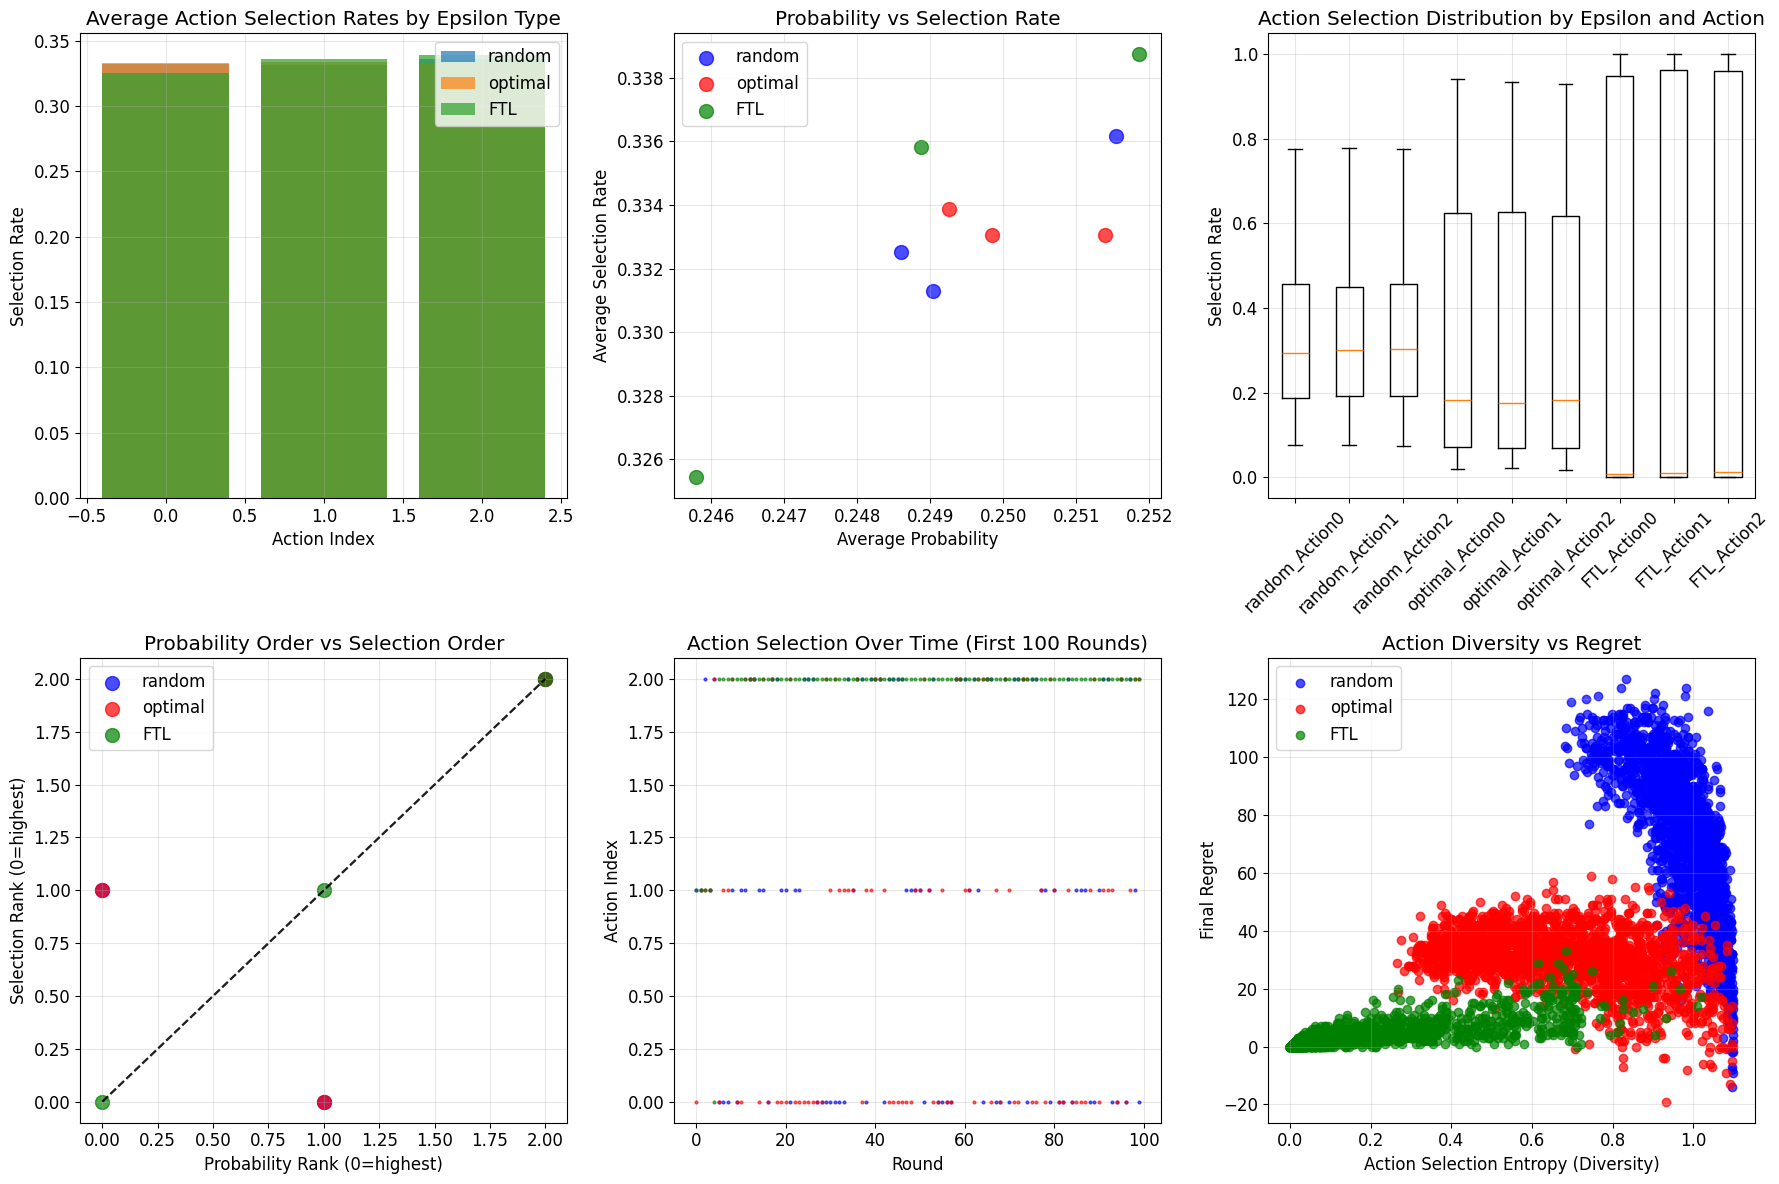


Detailed Action Analysis:

random (ε=0.010000):
------------------------------
Action Statistics:
  Action 0:
    Avg Probability: 0.2486
    Avg Selection Rate: 0.3325
    Selection Count: 332.5
  Action 1:
    Avg Probability: 0.2490
    Avg Selection Rate: 0.3313
    Selection Count: 331.3
  Action 2:
    Avg Probability: 0.2515
    Avg Selection Rate: 0.3362
    Selection Count: 336.2

  Probability-Selection Correlation: 0.9272
  Best Action (by probability): 2
  Most Selected Action: 2
  Algorithm learns best action: True

optimal (ε=0.033145):
------------------------------
Action Statistics:
  Action 0:
    Avg Probability: 0.2514
    Avg Selection Rate: 0.3330
    Selection Count: 333.0
  Action 1:
    Avg Probability: 0.2493
    Avg Selection Rate: 0.3339
    Selection Count: 333.9
  Action 2:
    Avg Probability: 0.2498
    Avg Selection Rate: 0.3331
    Selection Count: 333.1

  Probability-Selection Correlation: -0.7315
  Best Action (by probability): 0
  Most Selected Ac

In [17]:
# Visualize action selection patterns

# Create comprehensive action analysis plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Action selection rates by epsilon type
ax1 = axes[0, 0]
for epsilon_type in epsilon_values.keys():
    subset = action_df[action_df['epsilon_type'] == epsilon_type]
    avg_rates = np.mean([rates for rates in subset['action_rates']], axis=0)
    ax1.bar(range(k), avg_rates, alpha=0.7, label=f'{epsilon_type}')
ax1.set_xlabel('Action Index')
ax1.set_ylabel('Selection Rate')
ax1.set_title('Average Action Selection Rates by Epsilon Type')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Probability vs Selection Rate correlation
ax2 = axes[0, 1]
colors = {'random': 'blue', 'optimal': 'red', 'FTL': 'green'}
for epsilon_type in epsilon_values.keys():
    subset = action_df[action_df['epsilon_type'] == epsilon_type]
    avg_probs = np.mean([probs for probs in subset['probabilities']], axis=0)
    avg_rates = np.mean([rates for rates in subset['action_rates']], axis=0)
    ax2.scatter(avg_probs, avg_rates, color=colors[epsilon_type], 
                label=f'{epsilon_type}', s=100, alpha=0.7)
ax2.set_xlabel('Average Probability')
ax2.set_ylabel('Average Selection Rate')
ax2.set_title('Probability vs Selection Rate')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Action selection distribution (box plot)
ax3 = axes[0, 2]
action_data_by_epsilon = []
epsilon_labels = []
for epsilon_type in epsilon_values.keys():
    subset = action_df[action_df['epsilon_type'] == epsilon_type]
    for action_idx in range(k):
        action_rates = [rates[action_idx] for rates in subset['action_rates']]
        action_data_by_epsilon.append(action_rates)
        epsilon_labels.append(f'{epsilon_type}_Action{action_idx}')

ax3.boxplot(action_data_by_epsilon, labels=epsilon_labels)
ax3.set_ylabel('Selection Rate')
ax3.set_title('Action Selection Distribution by Epsilon and Action')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)

# Plot 4: Probability order vs Selection order
ax4 = axes[1, 0]
for epsilon_type in epsilon_values.keys():
    subset = action_df[action_df['epsilon_type'] == epsilon_type]
    avg_probs = np.mean([probs for probs in subset['probabilities']], axis=0)
    avg_rates = np.mean([rates for rates in subset['action_rates']], axis=0)
    
    prob_order = np.argsort(avg_probs)[::-1]
    selection_order = np.argsort(avg_rates)[::-1]
    
    ax4.scatter(prob_order, selection_order, color=colors[epsilon_type], 
                label=f'{epsilon_type}', s=100, alpha=0.7)
    
    # Add diagonal line for perfect correlation
    ax4.plot([0, k-1], [0, k-1], 'k--', alpha=0.5)

ax4.set_xlabel('Probability Rank (0=highest)')
ax4.set_ylabel('Selection Rank (0=highest)')
ax4.set_title('Probability Order vs Selection Order')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Plot 5: Action selection over time (first 100 rounds)
ax5 = axes[1, 1]
for epsilon_type in epsilon_values.keys():
    subset = action_df[action_df['epsilon_type'] == epsilon_type]
    # Take first simulation as example
    first_sim = subset.iloc[0]
    
    # Recreate action history for first 100 rounds
    env = BernoulliPayoffs(k)
    algorithm = ExponentialWeights(k, epsilon=first_sim['epsilon_value'], n=100)
    regret_history, total_payoff, action_history, cumulative_payoffs = algorithm.run_algorithm(env.generate_payoffs)
    
    # Plot action selection over time
    for action_idx in range(k):
        action_mask = np.array(action_history) == action_idx
        ax5.plot(np.where(action_mask)[0], np.ones(np.sum(action_mask)) * action_idx, 
                'o', color=colors[epsilon_type], alpha=0.6, markersize=2)

ax5.set_xlabel('Round')
ax5.set_ylabel('Action Index')
ax5.set_title('Action Selection Over Time (First 100 Rounds)')
ax5.grid(True, alpha=0.3)

# Plot 6: Regret vs Action Selection Correlation
ax6 = axes[1, 2]
for epsilon_type in epsilon_values.keys():
    subset = action_df[action_df['epsilon_type'] == epsilon_type]
    regrets = subset['final_regret'].values
    # Calculate entropy of action selection (diversity measure)
    entropies = []
    for rates in subset['action_rates']:
        # Calculate Shannon entropy
        rates_normalized = rates / np.sum(rates)
        entropy = -np.sum(rates_normalized * np.log(rates_normalized + 1e-10))
        entropies.append(entropy)
    
    ax6.scatter(entropies, regrets, color=colors[epsilon_type], 
                label=f'{epsilon_type}', alpha=0.7)

ax6.set_xlabel('Action Selection Entropy (Diversity)')
ax6.set_ylabel('Final Regret')
ax6.set_title('Action Diversity vs Regret')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
action_analysis_plot_path = figures_dir / 'bernoulli_action_analysis.png'
plt.savefig(action_analysis_plot_path, dpi=300, bbox_inches='tight')
print(f"Action analysis plots saved to {action_analysis_plot_path}")
plt.show()

# Print detailed statistics
print("\nDetailed Action Analysis:")
print("=" * 50)

for epsilon_type in epsilon_values.keys():
    subset = action_df[action_df['epsilon_type'] == epsilon_type]
    
    print(f"\n{epsilon_type} (ε={subset['epsilon_value'].iloc[0]:.6f}):")
    print("-" * 30)
    
    # Average probabilities and selection rates
    avg_probs = np.mean([probs for probs in subset['probabilities']], axis=0)
    avg_rates = np.mean([rates for rates in subset['action_rates']], axis=0)
    
    print("Action Statistics:")
    for i in range(k):
        print(f"  Action {i}:")
        print(f"    Avg Probability: {avg_probs[i]:.4f}")
        print(f"    Avg Selection Rate: {avg_rates[i]:.4f}")
        print(f"    Selection Count: {np.mean([counts[i] for counts in subset['action_counts']]):.1f}")
    
    # Correlation analysis
    correlation = np.corrcoef(avg_probs, avg_rates)[0, 1]
    print(f"\n  Probability-Selection Correlation: {correlation:.4f}")
    
    # Best action identification
    best_action_prob = np.argmax(avg_probs)
    most_selected_action = np.argmax(avg_rates)
    print(f"  Best Action (by probability): {best_action_prob}")
    print(f"  Most Selected Action: {most_selected_action}")
    print(f"  Algorithm learns best action: {best_action_prob == most_selected_action}")
